# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import prediction_error, residuals_plot
from yellowbrick.model_selection import FeatureImportances


# Importação dos dados

In [2]:
#dados podem ser encontrados nesse link"https://iaaumentada.s3.us-east-2.amazonaws.com/base-dados/flights.csv"
dados= pd.read_csv("flights.csv")
# dados.head()
# dados.describe()

# Algumas visualizações gráficas entre o "delay" e outras colunas  

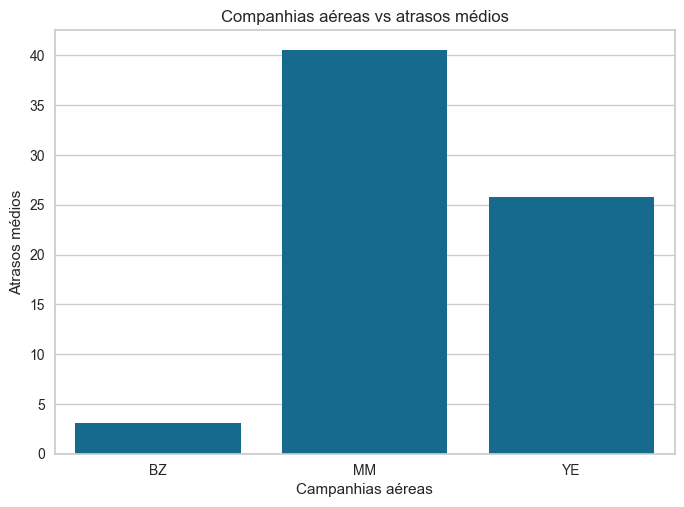

<function matplotlib.pyplot.show(close=None, block=None)>

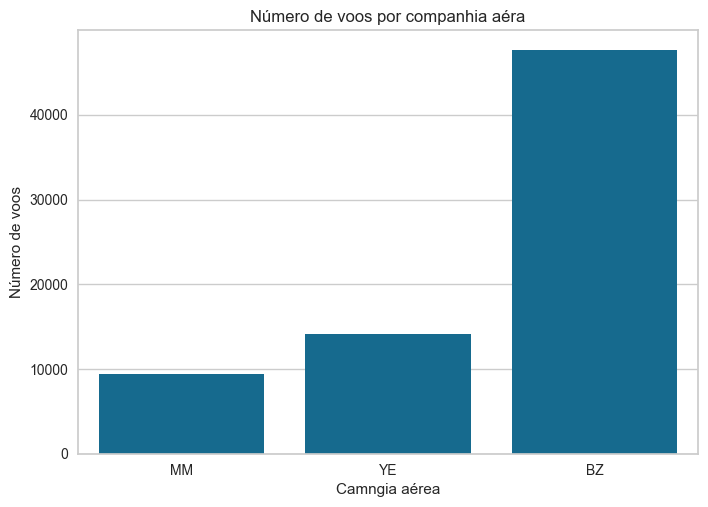

In [ ]:
# average_delay = dados.groupby("airline")["delay"].mean().reset_index()
# sns.barplot(x='airline', y= "delay", data= average_delay)
# plt.title("Companhias aéreas vs atrasos médios")
# plt.xlabel("Campanhias aéreas")
# plt.ylabel("Atrasos médios")
# plt.show()

# sns.countplot(data=dados, x="airline")
# plt.title("Número de voos por companhia aéra")
# plt.xlabel("Camngia aérea")
# plt.ylabel("Número de voos")
# plt.show

# average_delay = dados.groupby("schengen")["delay"].mean().reset_index()
# sns.barplot(x='schengen', y= "delay", data= average_delay)
# plt.title("Tipo de voo schengen vs atrasos médios")
# plt.xlabel("Tipo de voo schengen")
# plt.ylabel("Atrasos médios")
# plt.show()

# sns.countplot(data=dados, x="schengen")
# plt.title("Número de voos por companhia aéra")
# plt.xlabel("Tipo de voo schengen")
# plt.ylabel("Número de voos")
# plt.show

#average_delay = dados.groupby("is_holiday")["delay"].mean().reset_index()
# sns.barplot(x='is_holiday', y= "delay", data= average_delay)
# plt.title("Feriados vs atrasos médios")
# plt.xlabel("Feriados")
# plt.ylabel("Atrasos médios")
# plt.show()

# sns.countplot(data=dados, x="is_holiday")
# plt.title("Número de voos por companhia aéra")
# plt.xlabel("Feriados")
# plt.ylabel("Número de voos")
# plt.show

# average_delay = dados.groupby("aircraft_type")["delay"].mean().reset_index()
# sns.barplot(x='aircraft_type', y= "delay", data= average_delay)
# plt.title("Tipo de aviao vs atrasos médios")
# plt.xlabel("Tipo de aviao")
# plt.ylabel("Atrasos médios")
# plt.show()


# order = dados["aircraft_type"].value_counts().index
# sns.countplot(data=dados, x="aircraft_type", order= order)
# plt.title("Número de voos por companhia aéra")
# plt.xticks(rotation=70)
# plt.xlabel("Tipo da aeronava")
# plt.ylabel("Número de voos")
# plt.show



# Função para calcular o bin(espessura) do histograma

In [7]:
def calcular_bin(df, coluna):
    Q75, Q25= np.percentile(df[coluna], [75,25])
    IQR = Q75 - Q25
    largura_bin = 2*IQR*np.power(len(df[coluna]),-1/3)
    return largura_bin

# Visualização do histograma de "arrival_time"

<Axes: xlabel='arrival_time', ylabel='Count'>

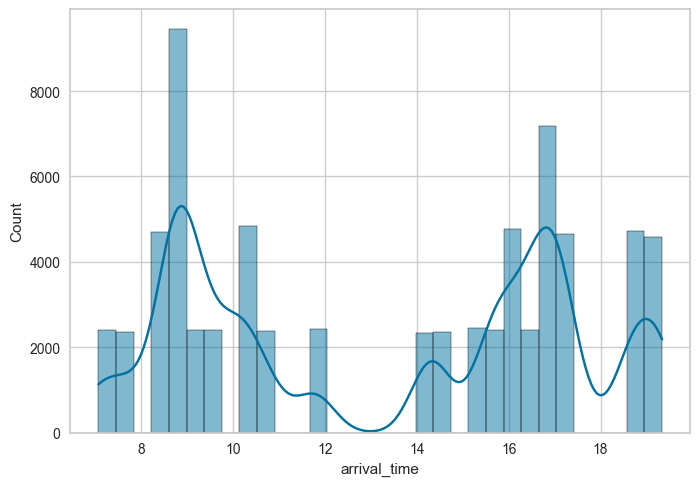

In [8]:
lagura_bin_at = calcular_bin(dados,"arrival_time")
sns.histplot(data=dados, x= "arrival_time", kde= True, binwidth=lagura_bin_at)

# Visualização do histograma de "departure_time"

<Axes: xlabel='departure_time', ylabel='Count'>

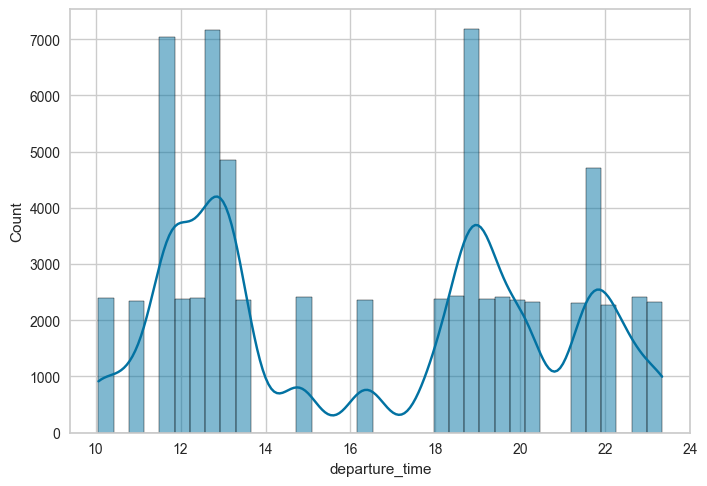

In [9]:
lagura_bin_dt = calcular_bin(dados,"departure_time")
sns.histplot(data=dados, x= "departure_time", kde= True, binwidth=lagura_bin_dt)

# Gráficos para analisar se os voos tem atrasam ou se adiantam mais 

###     E encontra a media e mediana dessas ocorrências

<function matplotlib.pyplot.show(close=None, block=None)>

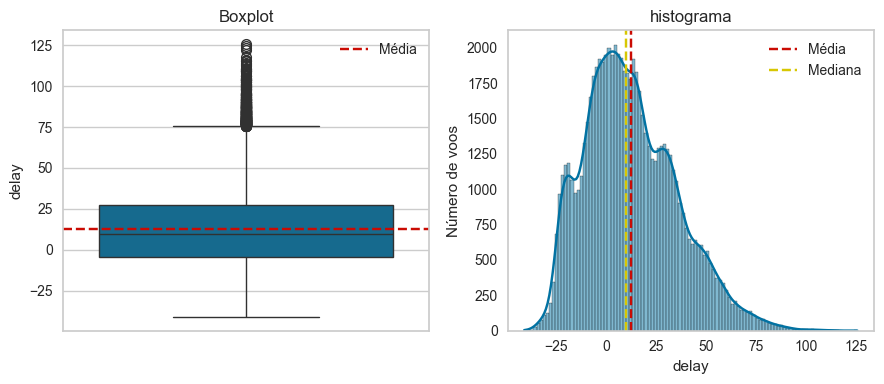

In [10]:
mean_delay = dados["delay"].mean()
median_delay = dados["delay"].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados,y="delay", ax=axes[0])
axes[0].set_title("Boxplot")

axes[0].axhline(y=mean_delay, color= "r", linestyle="--", label="Média")
axes[0].legend()

lagura_bin_dl = calcular_bin(dados,"delay")
sns.histplot(data=dados, x="delay", ax=axes[1], kde=True,binwidth=lagura_bin_dl)
plt.ylabel("Número de voos")
plt.grid(False)
axes[1].set_title("histograma")

axes[1].axvline(x=mean_delay, color="r", linestyle="--", label="Média")
axes[1].axvline(x=median_delay, color="y", linestyle="--", label="Mediana")
axes[1].legend()

plt.tight_layout()
plt.show

# Alteração dos dados nessas colunas para possibilitar o trabalho com elas

In [11]:
dados["date_time"] = pd.to_datetime(dados["year"].astype(str) + '-' + (dados["day"]+1).astype(str), format="%Y-%j")
dados["is_weekend"]= dados["date_time"].dt.weekday.isin([5,6])
dados["day_name"]= dados["date_time"].dt.day_name()

# Alteração dos dados nessas colunas para possibilitar o trabalho com elas

In [12]:
# dados.nunique()  informa a quantidades de "valores unicos" de todas as colunas
# dados["nome_da_coluna"].unique mostra os valores unicos de uma coluna
dados["schengen"] = dados["schengen"].replace({"non-schengen":0, "schengen":1})
dados["is_holiday"]= dados["is_holiday"].replace({False:0, True:1})
dados["is_weekend"]= dados["is_weekend"].replace({False:0, True:1})
dados.head()

C:\Users\Ggmerda\AppData\Local\Temp\ipykernel_3668\3779047536.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados["schengen"] = dados["schengen"].replace({"non-schengen":0, "schengen":1})
C:\Users\Ggmerda\AppData\Local\Temp\ipykernel_3668\3779047536.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados["is_holiday"]= dados["is_holiday"].replace({False:0, True:1})
C:\Users\Ggmerda\AppData\Local\Temp\ipykernel_3668\3779047536.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date_time,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


# Alteração dos dados nessas colunas para possibilitar o trabalho com elas

In [13]:
#usando o OneHotEncoder
# colunas_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

# one_hot_enc = make_column_transformer(
#     (OneHotEncoder(handle_unknown = 'ignore'),
#     colunas_categoricas),
#     remainder='passthrough')

# dados = one_hot_enc.fit_transform(dados)
# dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
# dados

var_categoricas= ["airline", "origin", "aircraft_type", "day_name"]

df_encoded= pd.get_dummies(data=dados, columns=var_categoricas, dtype=int)
df_encoded.head(2)

# df_encoded.info()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date_time,is_weekend,...,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


# Removendo colunas que atrapalhariam os modelos 

In [14]:
# df_encoded[["arrival_time","departure_time"]].corr() serve para ver a correlaçao entre as colunas e nos ajuda escolher qual devemos remover
df_clean= df_encoded.drop(["flight_id", "departure_time", "day", "year","date_time"], axis=1)
# df_clean.head(1)

# Definindo qual parte dos dados vai ser o x e y

In [15]:
x = df_clean.drop(["delay"], axis=1)
y= df_clean["delay"]

# Criação, treinamento e previsão do modelo (dummy)

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=42)

model_dummy = DummyRegressor()
model_dummy.fit(x_train, y_train)

y_pred_dummy = model_dummy.predict(x_test)

# Função que calcula as métricas/desempenho dos modelos

In [17]:
def calcular_metricas(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False) #root_mean_squared_error
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        "Raiz do Erro Quadratico": round(rmse, 4),
        "Erro Absoluto Medio": round(mae, 4),
        "R2 Score": round(r2, 4)
    }

    return metricas

# Utilização da função `calcular_metricas` para ver o desempenho do modelo(dummy)

In [18]:
calcular_metricas(y_test, y_pred_dummy)

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Raiz do Erro Quadratico': 23.2241,
 'Erro Absoluto Medio': 18.6127,
 'R2 Score': -0.0}

# Criação, treinamento e visualização do modelo (Random Forest)

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


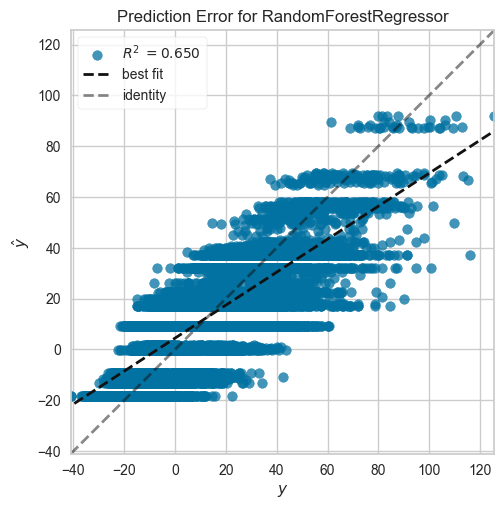

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


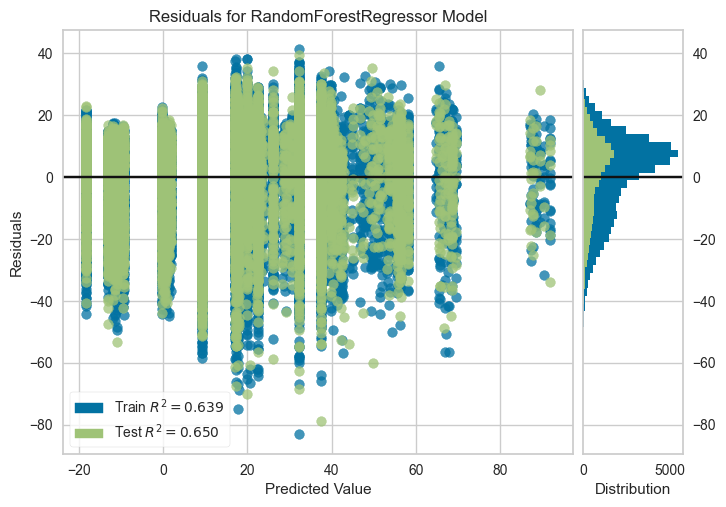

In [19]:
model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
calcular_metricas(y_test, y_pred_rf)
visu = prediction_error(model_rf, x_train, y_train, x_test, y_test)
viz= residuals_plot(model_rf, x_train, y_train, x_test, y_test)

# Fazendo a validação cuzada do modelo

In [20]:
scoring = {
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
    "r2": "r2"
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, x_train, y_train, cv=cv, scoring= scoring)
cv_results

{'fit_time': array([2.01000237, 1.92799783, 1.95400047, 1.93100142, 1.9470284 ]),
 'score_time': array([0.03799653, 0.03899932, 0.03899956, 0.03899884, 0.03900051]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

# Calculando as métricas nas "chaves de pontuação"

In [21]:
for metric in scoring.keys():
    scores = cv_results[f"test_{metric}"]
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print("-"*70)

MAE Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE Média: -11.151, Std: 0.088
----------------------------------------------------------------------
RMSE Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE Média: -13.883, Std: 0.101
----------------------------------------------------------------------
R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 Média: 0.638, Std: 0.008
----------------------------------------------------------------------


# Exibindo graficamente as colunas mais relevantes para o modelo, ordenado por importância

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


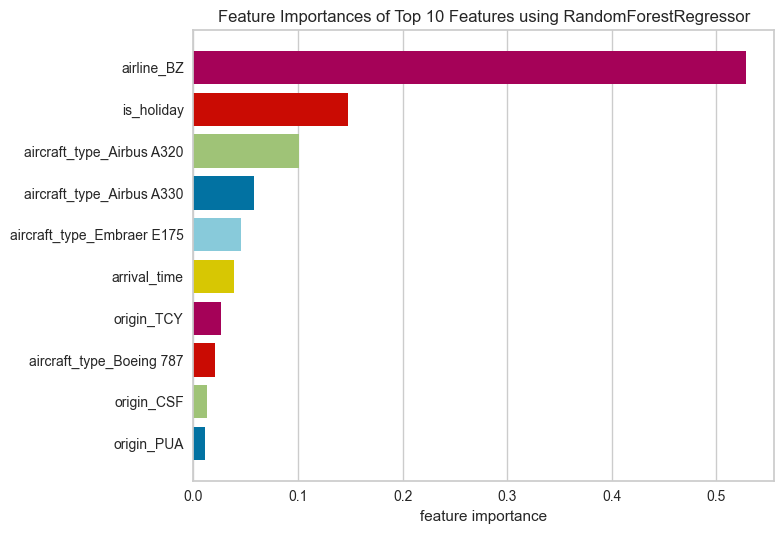

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [22]:
viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(x_train,y_train)
viz.show()

# Exibindo numericamente as colunas mais relevantes para o modelo, ordenado por importância

In [23]:
impor= model_rf.feature_importances_
feature_impor = pd.DataFrame({"Features": x.columns, "Importances":impor})
feature_impor.sort_values("Importances", ascending=False)

,Features,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
17,aircraft_type_Airbus A320,0.100719
18,aircraft_type_Airbus A330,0.058222
22,aircraft_type_Embraer E175,0.045620
1,arrival_time,0.038863
14,origin_TCY,0.026558
21,aircraft_type_Boeing 787,0.020228
9,origin_CSF,0.013006
13,origin_PUA,0.010643


# Método para descobrir o melhor numero de colunas

In [24]:
results_df = pd.DataFrame(index=["RMSE", "MAE", "R2"])

model_selceted= RandomForestRegressor(random_state=42, max_depth=5)

for count in [1, 5, 10, 15, 20, 25, 30]:
    selected_features = feature_impor["Features"].values[:count]

    X_train_selc= x_train[selected_features]
    X_test_selc= x_test[selected_features]

    model_selceted.fit(X_train_selc, y_train)

    y_pred = model_selceted.predict(X_test_selc)

    metricas = calcular_metricas(y_test,y_pred)

    results_df[count] = list(metricas.values())

results_df    

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.wa

,1,5,10,15,20,25,30
RMSE,23.0970,14.9389,14.9088,14.9342,13.7391,13.7284,13.7301
MAE,18.5637,12.0211,11.9903,11.9356,11.0316,11.0127,11.0138
R2,0.0109,0.5862,0.5879,0.5865,0.6500,0.6506,0.6505


# Método para descobrir o melhor numero de colunas (entre 10 a 15)

In [25]:
results_df = pd.DataFrame(index=["RMSE", "MAE", "R2"])

model_selceted= RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_impor["Features"].values[:count]

    X_train_selc= x_train[selected_features]
    X_test_selc= x_test[selected_features]

    model_selceted.fit(X_train_selc, y_train)

    y_pred = model_selceted.predict(X_test_selc)

    metricas = calcular_metricas(y_test,y_pred)

    results_df[count] = list(metricas.values())

results_df    

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.wa

,25,26,27,28,29,30
RMSE,13.7284,13.7285,13.7281,13.7288,13.7296,13.7301
MAE,11.0127,11.0127,11.0125,11.0132,11.0135,11.0138
R2,0.6506,0.6506,0.6506,0.6505,0.6505,0.6505


# Selecionado apenas as colunas mais importantes

In [26]:
selected_features = feature_impor["Features"].values[:13]
X_selected_features = x[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

# Treinando o modelo *n* vezes ate achar os melhores parâmetros

In [28]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
}

cv= KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring="r2", cv= cv)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

# Calculando as métricas do novo modelo

In [29]:
y_pred_model_grid = model_grid.predict(X_test)

metricas_model_grid = calcular_metricas(y_test, y_pred_model_grid)
metricas_model_grid

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Raiz do Erro Quadratico': 13.2322,
 'Erro Absoluto Medio': 10.6205,
 'R2 Score': 0.6754}

# Exibindo os melhores resultados

In [30]:
results_df["model_grid"] = list(metricas_model_grid.values())
results_df

,25,26,27,28,29,30,model_grid
RMSE,13.7284,13.7285,13.7281,13.7288,13.7296,13.7301,13.2322
MAE,11.0127,11.0127,11.0125,11.0132,11.0135,11.0138,10.6205
R2,0.6506,0.6506,0.6506,0.6505,0.6505,0.6505,0.6754


# Salvamento do modelo em um arquivo pickle

In [65]:
try:
    with open("model_producao.pkl","wb") as file:
        pickle.dump(model_grid.best_estimator_,file)
    print("modelo salvo")    
except Exception as e:
    print("Erro ao salvar modelo: ",str(e))

modelo salvo


# Maneira de usar o modelo posteriormente

In [ ]:
# import pickle
# file_path = './modelos/modelo_producao.pkl'

# try:
#     with open(file_path, 'rb') as file:
#         model = pickle.load(file)
#     print("Modelo carregado com sucesso!")
# except Exception as e:
#     print("Ocorreu um erro ao carregar o modelo:", str(e))
#     # Exemplo de previsão com dados de entrada 'X'
# model.predict([nova_amostra])[0]

